In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets



In [ ]:
# !pip install seaborn # if missing modules

In [4]:
stats.norm.rvs(10, size=10)

array([ 11.23193692,  10.89069316,   9.07592192,  10.60887138,
         9.37684289,  11.48557508,   9.6816088 ,   9.90806811,
        10.44129414,   9.84191533])

In [7]:
import statsmodels.stats.weightstats as sm

def plot_gaussian(u=0, n=10000, sd = 1, breaks=100):
    
    #fig, ax = plt.subplots(1, 1)
    fig, ax = plt.subplots(figsize=(9,6))
    x = np.linspace(stats.norm.ppf(0.01),
                 stats.norm.ppf(0.99), 100)
    

    r = stats.norm.rvs(size=n, scale=sd).tolist()
    
    newr = [i+u for i in r]
    #newr = np.array(newr)
   
    ax.hist(r, bins=breaks, normed=True, histtype='stepfilled', color=['teal'], alpha=0.2)
    
    if u!=0:
        ax.hist(newr, bins=breaks, normed=True, histtype='stepfilled', color=['red'], alpha=0.2)
    else:
        pass
    
    ax.legend(loc='best', frameon=False)
    ax.set_ylabel('normal curve with mean $x$')
    ax.set_xlabel('$x$')
    
    result = sm.ttest_ind(r, newr)
    
    print np.mean(newr),len(newr), np.mean(r), len(r)

    print "t = ", np.round(result[0], 3)
    print "df = ", np.round(result[2], 3)
    print "p = ", np.round(result[1], 5)
 
    ax.legend()


7.06139149886 10 -2.93860850114 10
t =  -2.116
df =  18.0
p =  0.04856


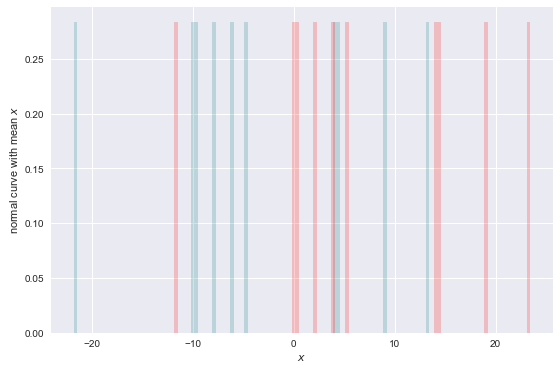

In [76]:
plot_gaussian(u=10, sd = 9, n=10, breaks=100)

In [61]:
import statsmodels.stats.weightstats as sm

r = stats.norm.rvs(size=100)

newr = [i+1 for i in r.tolist()]
newr = np.array(newr)
   

result = sm.ttest_ind(r, newr)

print "t = ", np.round(result[0], 3)
print "df = ", np.round(result[2], 3)
print "p = ", np.round(result[1], 3)


t =  -7.552
df =  198.0
p =  0.0


In [10]:
result = sm.ttost_paired(newr, np.zeros(len(newr)), 
                         low=np.mean(np.zeros(len(newr))), 
                         upp=np.mean(newr))

print "t =", result[1][0]
print "df = ", result[1][2]
print "p = ", result[1][1]

t = 9.01965815609
df =  99.0
p =  7.50706834608e-15


In [11]:
result

(0.5, (9.0196581560918023, 7.5070683460842714e-15, 99.0), (0.0, 0.5, 99.0))